In [1]:
import numpy as np #imports numpy as np. Numpy is used for basic matrix multiplication, addition, subtraction etc.
import tensorflow as tf #imports tensorflow as tf. Tensorflow is an n-dimensional matrix, just like a 1-D vector, 2-D array, 3-D array etc.
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data #imports mnist input data from tensorflow examples. 
#Mnist data set consists of images of numbers from 0-9, each image is a 28*28 dimensional. There are total 60k training images and 10k test images.
mnist = input_data.read_data_sets("MNIST/data", one_hot = True) #using input data call read data sets from a folder MNIST/data and store in mnist.
#one hot vector is used which means at once only one class will be true. Since our images have labels 0-9 that means out of all 10 classes only 1 class will be true at a time rest all will be zero.

Extracting MNIST/data/train-images-idx3-ubyte.gz
Extracting MNIST/data/train-labels-idx1-ubyte.gz
Extracting MNIST/data/t10k-images-idx3-ubyte.gz
Extracting MNIST/data/t10k-labels-idx1-ubyte.gz


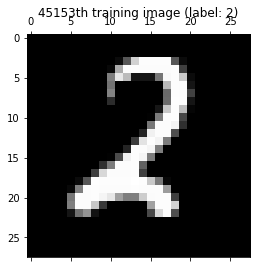

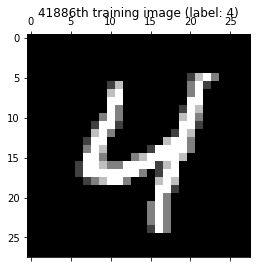

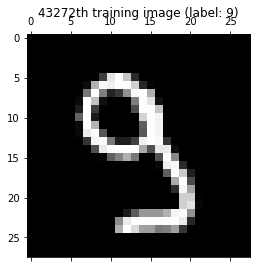

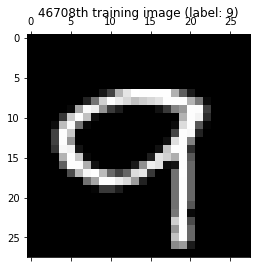

In [3]:
nsample = 4
rand_idx = np.random.randint(mnist.train.images.shape[0], size=nsample)

for i in rand_idx:
    curr_img = np.reshape(mnist.train.images[i, :], (28,28))
    curr_lbl = np.argmax(mnist.train.labels[i, :])
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title(""+str(i)+"th training image "
              + "(label: " + str(curr_lbl) + ")")
    plt.show()

In [30]:
#hyperparameters
learning_rate = 0.01 #learning rate is used to reduce our cost/loss/cross entropy and helps in converging or reaching the local optima. The learning rate should neither be too high or too low it should be a balanced rate. 
training_epochs = 25 #number of times we train our network, its like a loop which trains our network, calculates cost, optimizes it in every epoch, also in every epoch we take 
display_step = 1 #after how many epochs we want to output our desired results on screen
batch_size = 100 #this means that our training images will be divided in a fixed batch size and at every batch it will take a fixed number of images and train them. 

In [31]:
#placeholder is like a variable to which we will assign data later on. It will allow us to do operations and build our computation graph without feeding in data.
#x will hold the training images in form of matrix,the dimensions of x will be in our case None*784, that is why we use None which allows us to vary the dimensionality of our rows.
#we use float to define its type.
x = tf.placeholder("float",[None,784]) 
#similarly y will hold the label of the training images in form matrix which will be a None*10 matrix. None will be replaced by the number of images we want to train on.
y = tf.placeholder("float",[None,10])

#hyperparameters
W = tf.Variable(tf.zeros([784,10])) #we use variable instead of placeholder because a variable maintains state in the graph across calls to run(), we initially define Weights as all zeros which are then randomly changed in every epoch. The dimensions of W have to be in alignment with the dimensions of x as we have to multiply them in later stages.
b = tf.Variable(tf.zeros([10])) #we use a 10-D column vector which we then add with the result we get from x * W.

#here we do the prediction by using softmax classifier, we can also use ReLu, Sigmoid, Tan etc. We get a value between 0 and 1 which we then try to predict is for which particular class.
pred = tf.nn.softmax(tf.matmul(x, W) + b)

#here we calculate the loss, how far our predicted value is from the actual output class label, which we then try to minimize.
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices = 1))

#here we do the optimization where we try to minimize our cost function, by running GradientDescentOptimizer(backpropogate through the network) and use a learning rate which helps in achieving local optima.
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)             

In [32]:
#here we initialise all the variables in our model.
init = tf.global_variables_initializer()

In [33]:
# Launch the graph. #this is a class that runs all the tensorflow operations and launches the graph in a session. All the operations have to be within the indentation. 
with tf.Session() as sess:
    sess.run(init) ##sess.run(init), runs the variables that were initialised in the previous step and evaluates the tensor 

    # Training cycle
    #we use for loop, to loop around all the 25 training_epochs.

    for epoch in range(training_epochs):
        avg_cost = 0. #initialize avg_cost to zero.
        total_batch = int(mnist.train.num_examples/batch_size) #here we input our batch size and we store the output in total_batch. For eg: we have used 100 as batch size so our total_batch will be 550. You can try printing the value to see how it varies based on the batch size.
        
        for i in range(total_batch):   #now we iterate over each total_batch starting from 0-549
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)  #at each i we load 100 images and there labels in batch_xs and batch_ys, which are nothing but a matrix representation of images.
            
            # Fit training using batch data, think it as optimizer and cost being a root node and x and y their child or parent node.
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,       
                                                          y: batch_ys})
            # Compute average loss                                            
            avg_cost += c / total_batch  #we calculate cost for 100 images once at a time and every time we get next 100 images and this keeps on going for 550 times.
            
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print "Epoch:", '%04d'%(epoch+1), "cost=", "{:.9f}".format(avg_cost)

    print "Optimization Finished!"    

    # Test model, here we check whether the index of the maximum value of the predicted image is equal to the actual labelled image and both will be a column vector.
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    #calculate accuracy across the correct_prediction using reduce_mean. For eg: if we have 10 classes and out of which only 4 classes predicted result was true so we will get something like 4/10 as accuracy.
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # Calculate accuracy for 3000 examples
    print "Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]})

Epoch: 0001 cost= 1.184184278
Epoch: 0002 cost= 0.665409036
Epoch: 0003 cost= 0.552806490
Epoch: 0004 cost= 0.498703455
Epoch: 0005 cost= 0.465472227
Epoch: 0006 cost= 0.442540389
Epoch: 0007 cost= 0.425520185
Epoch: 0008 cost= 0.412190600
Epoch: 0009 cost= 0.401376767
Epoch: 0010 cost= 0.392374381
Epoch: 0011 cost= 0.384781689
Epoch: 0012 cost= 0.378152853
Epoch: 0013 cost= 0.372400416
Epoch: 0014 cost= 0.367281650
Epoch: 0015 cost= 0.362726723
Epoch: 0016 cost= 0.358613340
Epoch: 0017 cost= 0.354812526
Epoch: 0018 cost= 0.351458141
Epoch: 0019 cost= 0.348335585
Epoch: 0020 cost= 0.345452889
Epoch: 0021 cost= 0.342713490
Epoch: 0022 cost= 0.340214653
Epoch: 0023 cost= 0.337925483
Epoch: 0024 cost= 0.335768323
Epoch: 0025 cost= 0.333716870
Optimization Finished!
Accuracy: 0.888667
